Ransomware Detection Using Transformer

•	Topik Riset 1:

"Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba"

•	Deskripsi:

Model Transformer dilatih untuk mendeteksi pola enkripsi yang tiba-tiba dalam trafik jaringan. Dengan memanfaatkan arsitektur Transformer, model dapat mengenali urutan paket data yang menunjukkan aktivitas enkripsi ransomware secara dini sebelum terjadi dampak serius.

Novelty:

Tinggi. Penggunaan Transformer untuk mendeteksi pola enkripsi ransomware yang tiba-tiba dalam trafik jaringan belum banyak dieksplorasi secara spesifik. Transformer memiliki kemampuan menangani urutan data panjang dan deteksi pola, sehingga bisa menghadirkan pendekatan baru dalam prediksi serangan ransomware.

•	Dataset:

UNSW-NB15 Dataset
Dataset ini mencakup trafik yang mencakup berbagai serangan jaringan, termasuk backdoor, yang relevan untuk deteksi ransomware. Model Transformer dapat dilatih menggunakan pola trafik berbahaya dari dataset ini untuk mendeteksi aktivitas enkripsi ransomware.

URL: UNSW-NB15 Dataset:
https://research.unsw.edu.au/projects/unsw-nb15-dataset atau https://unsw-my.sharepoint.com/:f:/g/personal/z5025758_ad_unsw_edu_au/EnuQZZn3XuNBjgfcUu4DIVMBLCHyoLHqOswirpOQifr1ag?e=gKWkLS

Ransomware sering kali menggunakan backdoor untuk mendapatkan akses ke sistem sebelum mengenkripsi data, dan pola trafik yang terkait dengan akses tidak sah atau aktivitas yang mencurigakan dapat dianalisis untuk mendeteksi serangan tersebut.
Dengan menggunakan dataset ini, peneliti dapat melatih model untuk mengidentifikasi pola yang mencerminkan aktivitas ransomware, seperti enkripsi data yang tiba-tiba, serta menganalisis serangan sebelumnya yang mungkin memiliki hubungan dengan ransomware.

1. Klasifikasi Binary (Abnormal dan Normal):
Normal: Kategori ini mencakup lalu lintas atau aktivitas yang dianggap biasa dan tidak menunjukkan tanda-tanda serangan atau anomali. Contoh: pengguna yang mengakses file atau aplikasi dengan cara yang wajar.
Abnormal: Kategori ini mencakup aktivitas atau trafik yang menunjukkan perilaku mencurigakan atau serangan. Dalam konteks ransomware, ini termasuk pola yang dapat menunjukkan adanya aktivitas enkripsi data, akses tidak sah, atau penyebaran malware.

2. Klasifikasi Multi-Class:
Dalam konteks klasifikasi multi-class, Anda dapat menggunakan kategori yang berbeda untuk berbagai jenis serangan yang mungkin terdeteksi. Ini memungkinkan model untuk mengenali dan membedakan antara berbagai jenis ancaman. Kategorinya adalah sebagai berikut:

- Backdoor: Aktivitas yang menunjukkan adanya akses tidak sah ke sistem.
- DoS (Denial of Service): Serangan yang berusaha membuat layanan tidak tersedia.
- Exploits: Aktivitas yang memanfaatkan kerentanan dalam perangkat lunak atau sistem.
- Fuzzers: Pengujian perangkat lunak yang mencoba menemukan kerentanan dengan mengirimkan input yang tidak terduga.
- Generic: Aktivitas atau trafik yang tidak dapat dikategorikan dengan jelas dalam kelas lain.
- Normal: Trafik yang tidak mencurigakan dan dianggap wajar.
- Reconnaissance: Aktivitas yang berusaha mengumpulkan informasi tentang target sebelum serangan.
- Worms: Malware yang dapat menyebar sendiri melalui jaringan.
Relevansi Kategorisasi.

Dengan pendekatan ini, model deteksi Anda tidak hanya dapat mengidentifikasi apakah suatu aktivitas normal atau abnormal, tetapi juga dapat mengklasifikasikan jenis serangan tertentu yang terjadi. Ini sangat berguna dalam konteks keamanan siber karena memungkinkan respons yang lebih tepat dan terfokus terhadap jenis serangan tertentu.

Selain itu, jika ransomware terdeteksi, analisis dapat dilakukan lebih lanjut untuk memahami bagaimana serangan terjadi dan langkah-langkah pencegahan yang dapat diambil.
Kesimpulan
Pengkategorian yang Anda rencanakan akan memberikan kerangka kerja yang komprehensif untuk mendeteksi dan mengidentifikasi serangan, termasuk ransomware, dengan lebih efektif. Ini sangat penting dalam mengembangkan sistem deteksi intrusi yang mampu merespons berbagai ancaman keamanan dengan cepat dan efisien.

# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


NumPy (np): Digunakan untuk komputasi numerik, terutama untuk array dan operasi matematis.

Pandas (pd): Digunakan untuk manipulasi dan analisis data, terutama struktur DataFrame yang memudahkan pengelolaan data tabular.

Seaborn (sns) dan Matplotlib (plt): Library untuk visualisasi data. Seaborn memperluas kemampuan visualisasi Matplotlib dan menyediakan tema visual yang lebih canggih.

Pickle: Digunakan untuk menyimpan dan memuat objek Python ke/dari file dalam format biner. Biasanya digunakan untuk menyimpan model yang sudah dilatih agar tidak perlu dilatih ulang.

os.path: Berfungsi untuk manipulasi path (alamat file dan direktori).

Scikit-learn (sklearn):

MinMaxScaler, StandardScaler: Digunakan untuk normalisasi dan standarisasi fitur.
LabelEncoder: Digunakan untuk mengonversi label kategorikal menjadi numerik.
metrics, preprocessing: Kumpulan alat untuk evaluasi model dan pemrosesan awal data.
accuracy_score, classification_report: Untuk mengevaluasi performa model klasifikasi.
train_test_split: Untuk membagi data menjadi set pelatihan dan pengujian.

# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [ ]:
import os
os.chdir("/content/gdrive/My Drive/ASDOS/dataset")
!ls


model  UNSW_NB15.csv  UNSW_NB15_features.csv  UNSW_NB15_testing-set.csv


Memuat dataset:

Dataset UNSW_NB15.csv dimuat ke dalam variabel data.

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/ASDOS/dataset/UNSW_NB15.csv')


Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [ ]:
data.head(n=5)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

Mengatasi missing value:

Di sini, simbol '-' di kolom service diubah menjadi NaN, lalu baris yang memiliki nilai NaN dihapus menggunakan dropna.

In [ ]:
data[data['service']=='-']


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [ ]:
data['service'].replace('-',np.nan,inplace=True)


<ipython-input-8-193b95799c6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service'].replace('-',np.nan,inplace=True)


In [ ]:
data.isnull().sum()


,0
id,0
dur,0
proto,0
service,94168
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
data.shape


(175341, 45)

In [ ]:
data.dropna(inplace=True)


In [ ]:
data.shape


(81173, 45)

Memeriksa distribusi kategori:

Menampilkan jumlah serangan (dalam attack_cat) dan status koneksi (state) untuk mendapatkan gambaran distribusi data.

In [ ]:
data['attack_cat'].value_counts()


,count
attack_cat,
Generic,39496
Normal,19488
Exploits,16187
DoS,1791
Fuzzers,1731
Reconnaissance,1703
Analysis,564
Worms,114
Backdoor,99


In [ ]:
data['state'].value_counts()


,count
state,
INT,39580
FIN,33640
CON,7711
REQ,228
RST,14


In [ ]:
data


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


Memuat data fitur:

Dataset berisi nama kolom dan tipe data yang diharapkan dimuat ke dalam variabel features.

In [ ]:
features = pd.read_csv('/content/gdrive/My Drive/ASDOS/dataset/UNSW_NB15_features.csv')


In [ ]:
features.head()


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


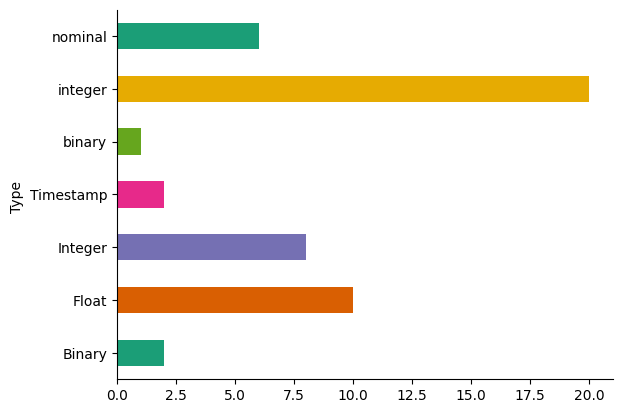

In [ ]:
# @title Type

from matplotlib import pyplot as plt
import seaborn as sns
features.groupby('Type ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Membersihkan data tipe fitur:

Mengubah nama tipe fitur menjadi huruf kecil untuk konsistensi.

In [ ]:
features['Type '] = features['Type '].str.lower()


Mengambil nama kolom berdasarkan tipe data:

Nama kolom dikelompokkan berdasarkan jenis data: nominal, integer, binary, dan float.

In [ ]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']


Menyesuaikan kolom dengan dataset utama:

Kolom dari dataset utama data disesuaikan dengan nama kolom yang diperoleh dari dataset fitur features.



In [ ]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)


Konversi tipe data:

Kolom yang dikelompokkan sebagai integer, binary, dan float dikonversi ke tipe data numerik.

In [ ]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])


In [ ]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])


In [ ]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])


Menampilkan kembali informasi data setelah pembersihan:

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [ ]:
data


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

## **Binary Classification**

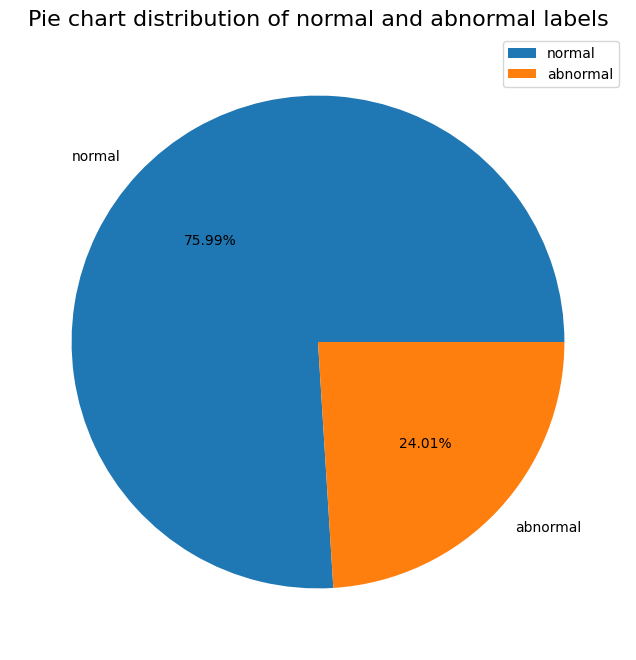

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.savefig('/content/gdrive/My Drive/ASDOS/pertemuan1/plot/Pie_chart_binary.png')
plt.show()

## **Multi-class Classification**

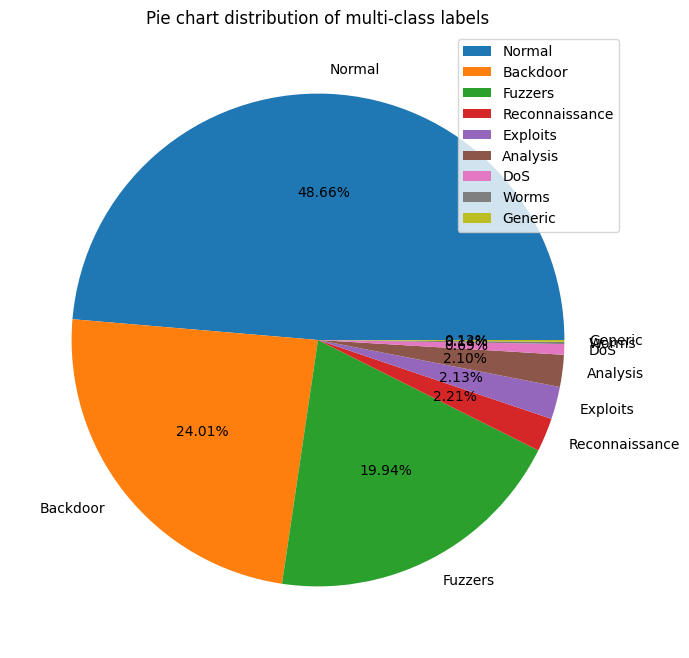

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.savefig('/content/gdrive/My Drive/ASDOS/pertemuan1/plot/Pie_chart_multi.png')
plt.show()

# **One hot encoding**

Memilih Kolom Numerik

Kode ini memilih kolom yang memiliki tipe data numerik dari dataframe data.

In [ ]:
num_col = data.select_dtypes(include='number').columns


Memilih Kolom Kategorikal

Kolom yang bukan numerik (kolom kategorikal) dipilih menggunakan difference antara semua kolom dan kolom numerik. Lalu, cat_col[1:] digunakan untuk menghilangkan kolom pertama (mungkin ID atau lainnya yang tidak relevan).

In [ ]:
# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

Membuat DataFrame dengan Kolom Kategorikal

Membuat salinan dari data kategorikal dan menampilkannya menggunakan head() untuk memverifikasi hasil.

In [ ]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()


,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


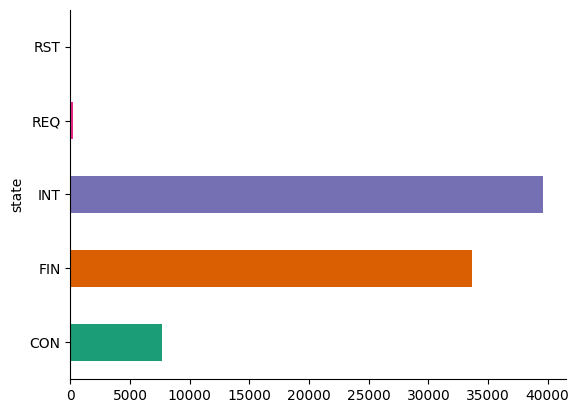

In [ ]:
# @title state

from matplotlib import pyplot as plt
import seaborn as sns
data_cat.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

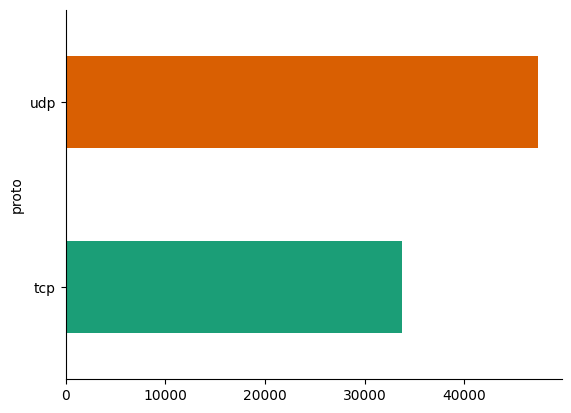

In [ ]:
# @title proto

from matplotlib import pyplot as plt
import seaborn as sns
data_cat.groupby('proto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

One-Hot Encoding Kolom Kategorikal

Menggunakan one-hot encoding untuk mengonversi kolom kategorikal menjadi representasi numerik biner. Setiap kategori unik pada setiap kolom akan menghasilkan kolom baru yang terpisah.

In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)


In [ ]:
data_cat.head()


,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.shape


(81173, 45)

Menggabungkan Data Kategorikal yang Sudah di-Encoding dengan Dataset Utama

Dataset data yang sudah ada digabungkan dengan dataset data_cat yang sudah dikodekan, dengan menggabungkan secara horizontal (menggunakan axis=1).

In [ ]:
data = pd.concat([data, data_cat],axis=1)


In [ ]:
data.shape


(81173, 64)

Menghapus Kolom Kategorikal Asli

Setelah kolom kategorikal diubah menjadi representasi one-hot encoding, kolom asli yang masih dalam bentuk kategorikal dihapus dari data.

In [ ]:
data.drop(columns=cat_col,inplace=True)


Memeriksa Bentuk Dataset

Menampilkan ukuran dataset untuk memverifikasi apakah jumlah kolom bertambah setelah proses one-hot encoding dan penggabungan.

In [ ]:
data.shape


(81173, 61)

Hasil Akhir:
Dataset data sekarang hanya memiliki fitur numerik, baik yang asli maupun yang dihasilkan dari one-hot encoding.

# **Data Normalization**


Memilih Kolom Numerik (Kecuali id dan label)

Kode ini memilih semua kolom numerik dari dataset kecuali id dan label.
num_col akan berisi daftar nama kolom yang akan dinormalisasi.

In [ ]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)


['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


Menginisialisasi MinMaxScaler

MinMaxScaler digunakan untuk menskalakan data numerik ke rentang yang diinginkan, dalam hal ini antara 0 dan 1.

In [ ]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))


Mendefinisikan Fungsi Normalisasi

Fungsi normalization() menerima dua argumen: df (dataframe) dan col (daftar kolom yang akan dinormalisasi).
Setiap kolom yang dipilih (i) diubah menjadi array NumPy, lalu dinormalisasi dengan MinMaxScaler.
Setelah setiap kolom dinormalisasi, dataframe hasil dikembalikan.

In [ ]:
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df


Menampilkan Data Sebelum Normalisasi

Menampilkan beberapa baris pertama data sebelum dilakukan normalisasi.

In [ ]:
# data before normalization
data.head()


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,False,False,False,False,False,False,True,False,False,False
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,False,True,False,False,False,False,True,False,False,False
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,False,False,True,False,False,False,False,True,False,False
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,False,False,False,False,False,False,True,False,False,False
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,False,False,False,False,False,False,True,False,False,False


Memanggil Fungsi Normalisasi

Data yang dipilih (data.copy()) disalin dan kemudian dinormalisasi pada kolom yang ada dalam num_col.

In [ ]:
# calling normalization() function
data = normalization(data.copy(),num_col)


Menampilkan Data Setelah Normalisasi

Menampilkan beberapa baris pertama data setelah proses normalisasi selesai.

In [ ]:
# data after normalization
data.head()


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,False,False,False,False,False,False,True,False,False,False
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,False,True,False,False,False,False,True,False,False,False
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,False,False,True,False,False,False,False,True,False,False
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,False,False,False,False,False,False,True,False,False,False
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,False,False,False,False,False,False,True,False,False,False


Penjelasan:
Normalisasi sangat penting karena semua fitur memiliki bobot yang setara karena berada dalam rentang nilai yang sama. Proses ini tidak akan mempengaruhi kolom id dan label, karena mereka dikecualikan dari proses normalisasi.

# **Label Encoding**

## **Binary Labels**

Mengubah Label Serangan Menjadi 'normal' dan 'abnormal'

Menggunakan lambda function untuk mengubah nilai dalam kolom label.
Jika label bernilai 0, maka diganti menjadi 'normal'.
Jika label tidak 0 (misalnya 1), maka diganti menjadi 'abnormal'.
Hasilnya adalah dataframe bin_label yang berisi label 'normal' dan 'abnormal'.

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))


Menambahkan Label Biner ke Data Asli

Membuat salinan dari dataset asli (data.copy()) untuk memastikan dataset asli tidak terpengaruh langsung oleh perubahan ini.
Kolom label dalam dataframe baru bin_data diubah menjadi label biner ('normal' dan 'abnormal').

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label


Melakukan Label Encoding pada Label Biner

Menggunakan LabelEncoder dari scikit-learn untuk mengonversi label 'normal' dan 'abnormal' menjadi angka biner (0 dan 1).
Hasilnya, normal dikodekan sebagai 0 dan abnormal dikodekan sebagai 1, lalu dimasukkan kembali ke kolom label di bin_data.

In [ ]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label


Melihat Kelas yang Terencoding

Menampilkan kelas yang telah terencoding, yang akan menunjukkan ['abnormal', 'normal'], dengan urutan encoding abnormal = 0, normal = 1 (atau sebaliknya, tergantung urutan yang diterima oleh LabelEncoder).

In [ ]:
le1.classes_


array(['abnormal', 'normal'], dtype=object)

Menyimpan Kelas yang Terenkoding

In [ ]:
np.save("/content/gdrive/My Drive/ASDOS/pertemuan1/le1_classes.npy",le1.classes_,allow_pickle=True)


Menyimpan array yang berisi informasi kelas (le1.classes_) ke Google Drive sebagai file .npy. Ini berguna jika nanti ingin memuat kelas yang telah di-encode untuk keperluan validasi model atau interpretasi hasil.

## **Multi-class Labels**

Membuat Salinan Data

multi_data: Membuat salinan dari dataset asli untuk menjaga dataset asli tetap utuh.
multi_label: Membuat dataframe baru berisi kolom attack_cat yang berisi kategori serangan (sebelum diubah).

In [ ]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)


One-Hot Encoding untuk Kolom attack_cat

One-hot encoding: Mengonversi kolom kategorikal attack_cat menjadi beberapa kolom biner, satu kolom untuk setiap kategori unik dalam attack_cat. Nilai 1 menunjukkan bahwa data tersebut termasuk dalam kategori tersebut, dan 0 sebaliknya.
Setelah langkah ini, dataset multi_data akan memiliki kolom-kolom tambahan, satu untuk setiap kategori serangan

In [ ]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])


Label Encoding untuk Multikelas

Menggunakan LabelEncoder untuk mengonversi label serangan dalam kolom attack_cat menjadi nilai numerik (0, 1, 2, ... dst.). Ini berguna untuk algoritma machine learning yang membutuhkan label dalam bentuk numerik.
Hasil dari LabelEncoder adalah urutan nilai integer yang mewakili kategori unik dari serangan. Misalnya, jika terdapat 9 kategori serangan, maka label akan berada dalam rentang 0 hingga 8.
Kolom label dalam dataframe multi_data kemudian diisi dengan hasil encoding ini.

In [ ]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label


Menampilkan Kelas yang Terencode

Kode ini menampilkan kategori attack_cat yang telah diencode, dan menunjukkan urutan nilai yang dihasilkan dari LabelEncoder. Misalnya, ['Analysis', 'Backdoor', 'DoS', ..., 'Worm'] akan diencode sebagai 0, 1, 2, ....

In [ ]:
le2.classes_


array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

Menyimpan Kelas yang Terenkoding
python

Kelas yang terencode disimpan dalam file .npy untuk digunakan nanti. Hal ini berguna jika Anda ingin melacak urutan encoding dan memastikan bahwa prediksi model dapat dikembalikan ke label asli.

In [ ]:
np.save("/content/gdrive/My Drive/ASDOS/pertemuan1/le2_classes.npy",le2.classes_,allow_pickle=True)


# **Correlation between features of dataset**

In [ ]:
num_col.append('label')


## **Correlation Matrix for Binary Labels**

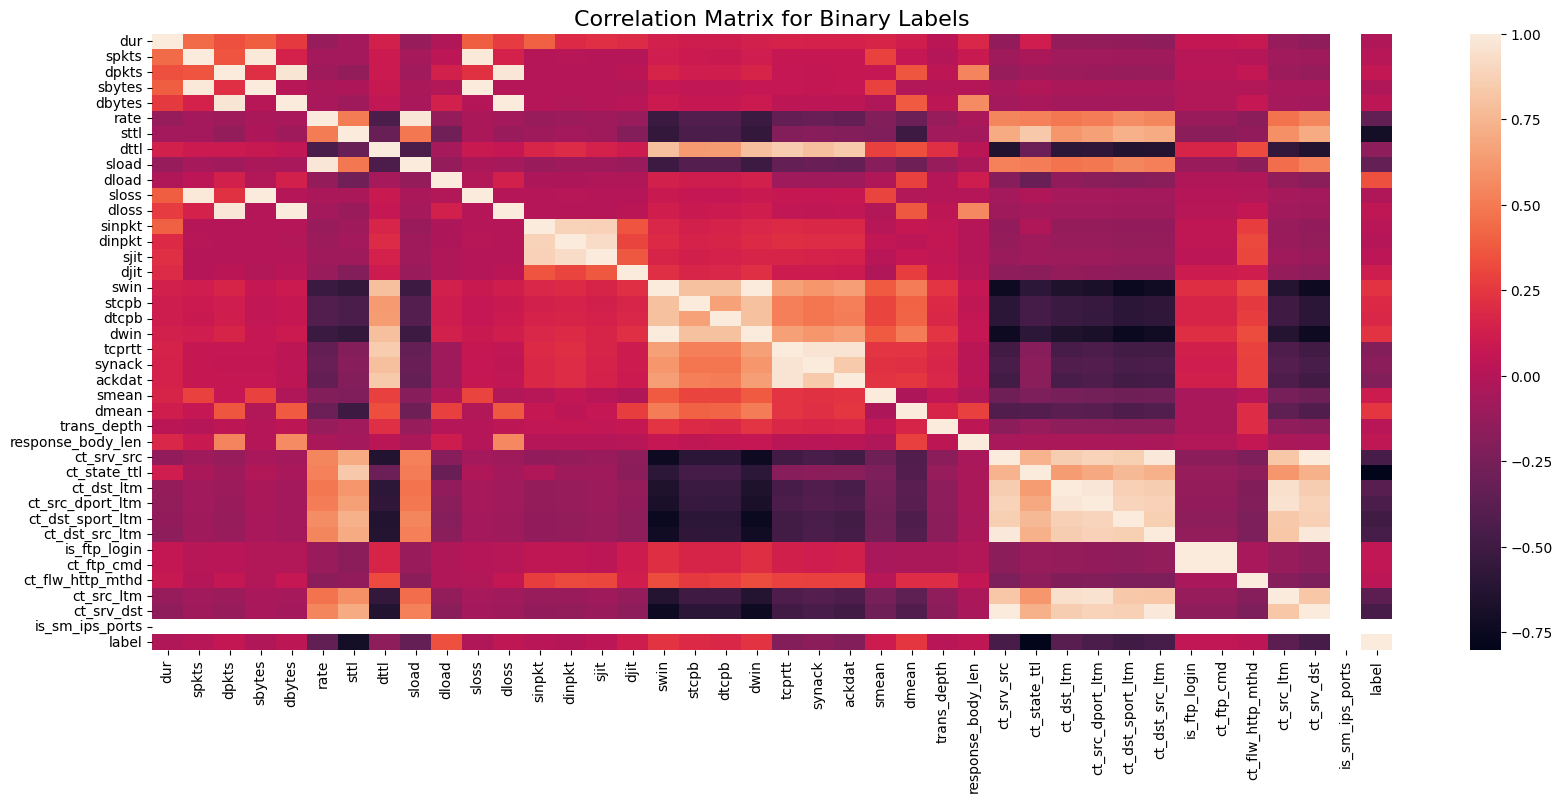

In [ ]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = bin_data[num_col].corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.savefig('/content/gdrive/My Drive/ASDOS/pertemuan1/plot/correlation_matrix_bin.png')
plt.show()


## **Correlation Matrix for Multi-class Labels**

In [ ]:
num_col = list(multi_data.select_dtypes(include='number').columns)


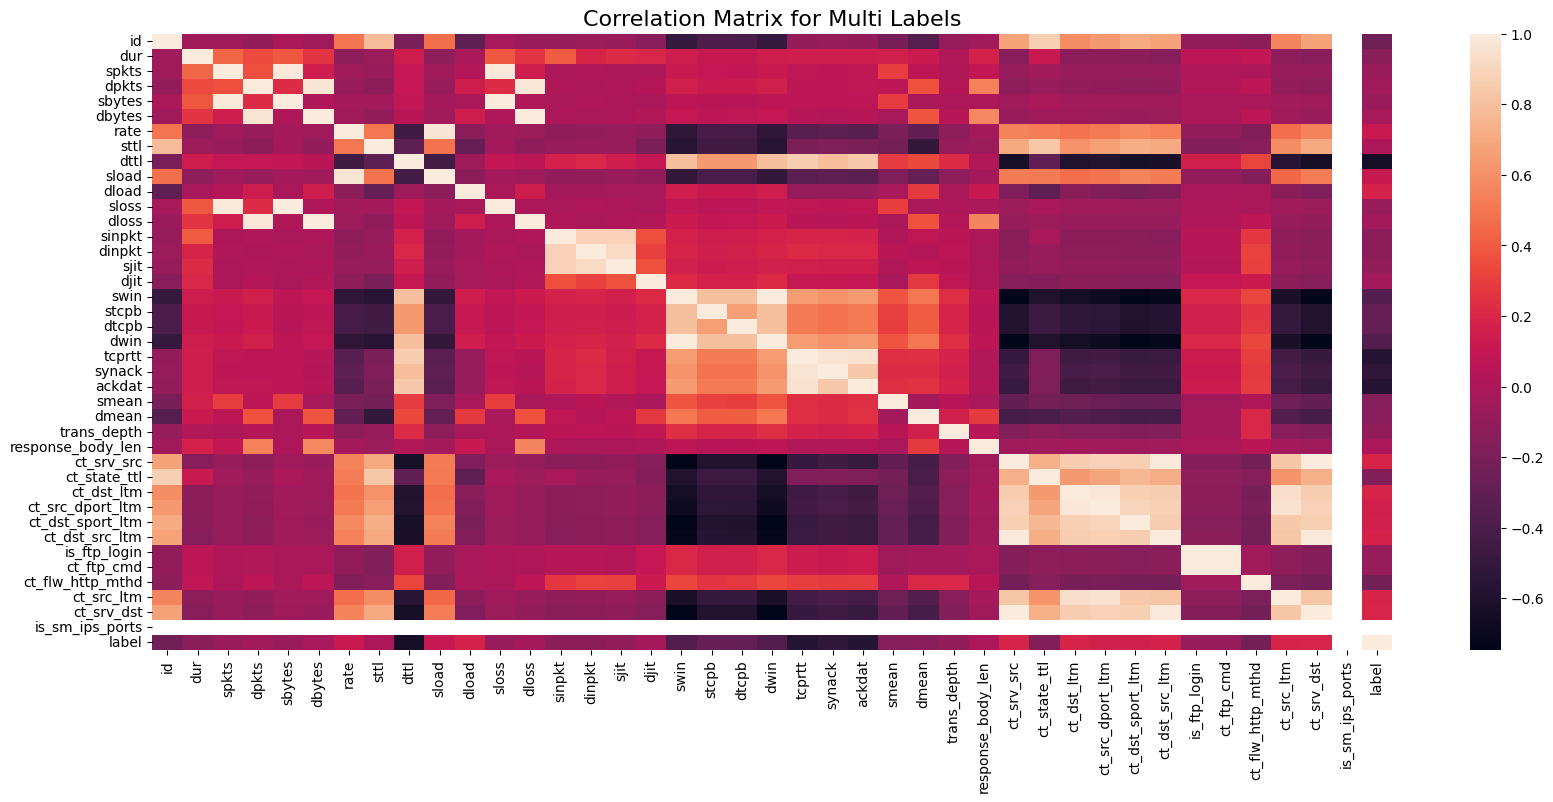

In [ ]:
# Correlation Matrix for Multi-class Labels
plt.figure(figsize=(20,8))
corr_multi = multi_data[num_col].corr()
sns.heatmap(corr_multi,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multi Labels',fontsize=16)
plt.savefig('/content/gdrive/My Drive/ASDOS/pertemuan1/plot/correlation_matrix_multi.png')
plt.show()


# **Feature Selection**

## **Binary Labels**

Menghitung Korelasi Absolut

abs(corr_bin['label']): Mengambil kolom label dari matriks korelasi (corr_bin) dan menghitung nilai absolutnya. Ini memastikan bahwa kita hanya melihat kekuatan korelasi tanpa memperhatikan apakah itu positif atau negatif.

Menemukan Atribut dengan Korelasi Tinggi

Memfilter atribut-atribut yang memiliki nilai korelasi lebih besar dari 0,3. Hasilnya, highest_corr_bin akan berisi atribut yang memiliki korelasi signifikan dengan label.

Mengurutkan Atribut Berdasarkan Korelasi

Mengurutkan nilai korelasi dalam urutan menaik (ascending). Ini membantu untuk melihat atribut dengan korelasi terendah terlebih dahulu, memberikan gambaran yang lebih jelas tentang atribut mana yang paling sedikit berhubungan dengan label biner.

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)


,label
sload,0.334562
dload,0.343910
rate,0.344535
ct_src_ltm,0.368486
ct_dst_ltm,0.387358
ct_src_dport_ltm,0.444874
ct_srv_dst,0.459984
ct_srv_src,0.463153
ct_dst_src_ltm,0.463735
ct_dst_sport_ltm,0.497234


Mengambil Nama Kolom Atribut

highest_corr_bin.index: Mendapatkan nama kolom dari atribut yang memiliki korelasi lebih dari 0,3 dan menyimpannya dalam variabel bin_cols.

In [ ]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols


Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'label'],
      dtype='object')

Membuat Dataset Biner dengan Atribut Terkait

Membuat salinan dataset bin_data dengan hanya kolom-kolom yang memiliki korelasi tinggi dengan label. Ini menciptakan dataset baru yang hanya berisi fitur yang dianggap relevan.

In [ ]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data


,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0


Menyimpan Dataset Biner ke File CSV

Menyimpan dataset biner yang baru dibuat ke dalam file CSV di Google Drive. Ini memungkinkan Anda untuk mengakses dataset ini di masa mendatang untuk analisis lebih lanjut atau pelatihan model.

In [ ]:
bin_data.to_csv('/content/gdrive/My Drive/ASDOS/pertemuan1/bin_data.csv')


Hasil Akhir:
Anda mendapatkan dataset biner (bin_data) yang hanya berisi fitur-fitur yang memiliki korelasi lebih dari 0,3 dengan label biner, dan dataset ini disimpan dalam file CSV.
Dengan fokus pada fitur-fitur yang memiliki korelasi signifikan, Anda dapat meningkatkan efisiensi model yang akan dilatih, karena hanya menggunakan fitur yang relevan.

## **Multi-class Labels**

Mencari Atribut dengan Korelasi Tinggi

corr_ymulti: Mengambil kolom label dari matriks korelasi (corr_multi) dan menghitung nilai absolutnya untuk mendapatkan kekuatan korelasi tanpa memperhatikan tanda.
highest_corr_multi: Memfilter atribut-atribut yang memiliki nilai korelasi lebih dari 0,3 dengan label, mengindikasikan bahwa atribut tersebut memiliki hubungan signifikan.
sort_values(ascending=True): Mengurutkan atribut berdasarkan nilai korelasi secara menaik.
multi_cols: Menyimpan nama kolom dari atribut yang memiliki korelasi tinggi dalam variabel multi_cols.

In [ ]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)


,label
swin,0.364393
dwin,0.364393
synack,0.524027
ackdat,0.570098
tcprtt,0.570205
dttl,0.646589
label,1.000000


In [ ]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols


Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label'], dtype='object')

Membuat Dataset Multikelas dengan Atribut Terkait

Membuat salinan dari dataset multi_data dengan hanya kolom-kolom yang memiliki korelasi tinggi dengan label multikelas.
Dataset ini kemudian disimpan sebagai file CSV (multi_data.csv) di Google Drive, memungkinkan akses di masa mendatang untuk analisis lebih lanjut atau pelatihan model.

In [ ]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()


In [ ]:
multi_data.to_csv('/content/gdrive/My Drive/ASDOS/pertemuan1/multi_data.csv')


# **DATA SPLITTING**

In [ ]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


Mempersiapkan Data untuk Model

X_bin dan y_bin: Membagi dataset biner (bin_data) menjadi fitur (X_bin) dan label (y_bin).
X_multi dan y_multi: Membagi dataset multikelas (multi_data) menjadi fitur (X_multi) dan label (y_multi).

train_test_split(): Digunakan untuk membagi dataset menjadi data pelatihan dan pengujian:
Dataset Biner:
80% untuk pelatihan (X_train_bin, y_train_bin).
20% untuk pengujian (X_test_bin, y_test_bin).
Dataset Multikelas:
70% untuk pelatihan (X_train_multi, y_train_multi).
30% untuk pengujian (X_test_multi, y_test_multi).
random_state: Menentukan seed acak untuk memastikan reprodusibilitas pembagian dataset.

In [ ]:
# 9. Mempersiapkan Data untuk Model
#X_bin = bin_data.drop('label', axis=1).values
#y_bin = bin_data['label'].values

#X_multi = multi_data.drop('label', axis=1).values
#y_multi = multi_data['label'].values

X_bin = bin_data.drop(columns=['label'],axis=1)
y_bin = bin_data['label']

X_multi = multi_data.drop(columns=['label'],axis=1)
y_multi = multi_data['label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=100)


In [ ]:
# 9. Mempersiapkan Data untuk Model
#X_bin = bin_data.drop('label', axis=1).values
#y_bin = bin_data['label'].values

#X_multi = multi_data.drop('label', axis=1).values
#y_multi = multi_data['label'].values

X_bin = bin_data.drop(columns=['label'],axis=1)
y_bin = bin_data['label']

X_multi = multi_data.drop(columns=['label'],axis=1)
y_multi = multi_data['label']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=50)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=50)


# **TRANSFORMER**

In [ ]:
# Mengonversi ke tensor PyTorch
#X_train_tensor_bin = torch.FloatTensor(X_train_bin.values) # Convert DataFrame to NumPy array using .values
#y_train_tensor_bin = torch.LongTensor(y_train_bin.values) # Convert Series to NumPy array using .values
#X_test_tensor_bin = torch.FloatTensor(X_test_bin.values) # Convert DataFrame to NumPy array using .values
#y_test_tensor_bin = torch.LongTensor(y_test_bin.values) # Convert Series to NumPy array using .values

#X_train_tensor_multi = torch.FloatTensor(X_train_multi.values) # Convert DataFrame to NumPy array using .values
#y_train_tensor_multi = torch.LongTensor(y_train_multi.values) # Convert Series to NumPy array using .values
#X_test_tensor_multi = torch.FloatTensor(X_test_multi.values) # Convert DataFrame to NumPy array using .values
#y_test_tensor_multi = torch.LongTensor(y_test_multi.values) # Convert Series to NumPy array using .values

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [ ]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


# **BINARY CLASSIFICATION**

Mengimpor Modul yang Diperlukan

Mengimpor semua modul yang diperlukan untuk pemrosesan data, evaluasi model, serta membangun dan melatih model menggunakan PyTorch.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Normalisasi Data

Menggunakan StandardScaler untuk menormalkan fitur data dari bin_data, yang membantu dalam pelatihan model.

In [ ]:
# Normalize the feature data
scaler = StandardScaler()
X_bin = scaler.fit_transform(bin_data.drop(columns=['label'], axis=1).values)
y_bin = bin_data['label'].values


Mendefinisikan Model Transformer

Model TransformerModel dibuat sebagai subclass dari nn.Module:
embedding: Layer untuk mengubah dimensi input menjadi 64.
transformer_encoder: Membangun encoder transformer dengan beberapa layer.
fc: Layer linier untuk menghasilkan prediksi kelas akhir.
forward: Mengimplementasikan langkah maju dari model, termasuk embedding, pengolahan melalui encoder, dan pooling rata-rata sebelum prediksi.

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4, batch_first=True),
            num_layers=3)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        x = self.fc(x)
        return x


KFold Cross Validation

KFold Cross Validation digunakan untuk membagi dataset menjadi 5 lipatan untuk evaluasi model yang lebih baik.
Variabel untuk menyimpan akurasi, matriks kebingungan, dan skor F1 dari setiap lipatan diinisialisasi.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=50)
all_accuracy = []
conf_matrix_list = []
all_f1_scores = []


Pelatihan dan Validasi untuk Setiap Lipatan

Untuk setiap lipatan, dataset dibagi menjadi set pelatihan dan validasi.
Data kemudian diubah menjadi tensor PyTorch dan dimasukkan ke dalam DataLoader untuk batching.

In [ ]:
for fold, (train_index, val_index) in enumerate(kf.split(X_bin)):
    print(f'Fold {fold + 1}')

    # Split the data into training and validation sets
    X_train, X_val = X_bin[train_index], X_bin[val_index]
    y_train, y_val = y_bin[train_index], y_bin[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader for batching
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


Inisialisasi Model dan Proses Pelatihan

Model Transformer diinisialisasi, dan fungsi kehilangan CrossEntropyLoss serta optimizer Adam digunakan untuk melatih model.

In [ ]:
    model = TransformerModel(input_dim=X_train.shape[1], num_classes=2)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


Proses Pelatihan dan Validasi

Model dilatih selama sejumlah epoch yang telah ditentukan.
Setelah setiap epoch, model dievaluasi pada set validasi untuk menghitung akurasi.

In [ ]:
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        scheduler.step()  # Step the scheduler after each epoch

        # Evaluate the model on validation set
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred.numpy())


Proses Pelatihan dan Validasi

Model dilatih selama sejumlah epoch yang telah ditentukan.
Setelah setiap epoch, model dievaluasi pada set validasi untuk menghitung akurasi.

In [ ]:
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        scheduler.step()  # Step the scheduler after each epoch

        # Evaluate the model on validation set
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred.numpy())


Penyimpanan Model Terbaik dan Metrik

Model terbaik disimpan berdasarkan akurasi. Jika tidak ada peningkatan dalam beberapa epoch, pelatihan akan dihentikan lebih awal.

In [ ]:
        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break


Menghitung dan Menyimpan Metrik

Setelah evaluasi, matriks kebingungan, akurasi, skor F1, presisi, dan recall dihitung untuk setiap lipatan.

In [ ]:
    # Calculate and store metrics
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    all_accuracy.append(accuracy)
    conf_matrix_list.append(conf_matrix)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    precision = precision_score(y_val, y_pred.numpy(), average='weighted')
    recall = recall_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)


Menampilkan Hasil

Matriks kebingungan untuk setiap lipatan ditampilkan menggunakan seaborn.
Rata-rata akurasi dan skor F1 di seluruh lipatan dihitung dan dicetak.

In [ ]:
    # Plot confusion matrix for each fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Average accuracy and F1 Score across folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')


Rata-rata Matriks Kebingungan

Rata-rata matriks kebingungan di seluruh lipatan dihitung dan ditampilkan.

In [ ]:
# Plotting the average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()


HASIL

Fold 1
Early stopping triggered at epoch 8
Accuracy for fold 1: 97.94%
F1 Score for fold 1: 0.9790
              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12326
      normal       1.00      0.91      0.96      3909

    accuracy                           0.98     16235
   macro avg       0.99      0.96      0.97     16235
weighted avg       0.98      0.98      0.98     16235



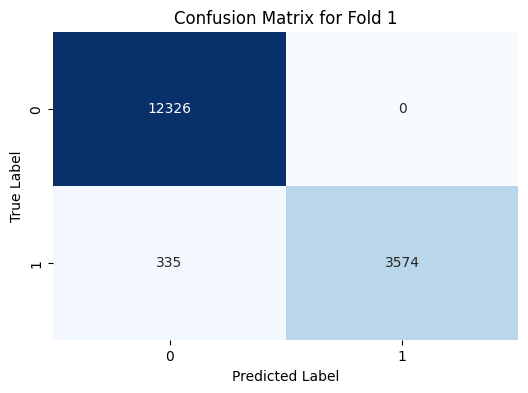

Fold 2
Early stopping triggered at epoch 19
Accuracy for fold 2: 98.17%
F1 Score for fold 2: 0.9816
              precision    recall  f1-score   support

    abnormal       0.98      1.00      0.99     12286
      normal       0.98      0.94      0.96      3949

    accuracy                           0.98     16235
   macro avg       0.98      0.97      0.97     16235
weighted avg       0.98      0.98      0.98     16235



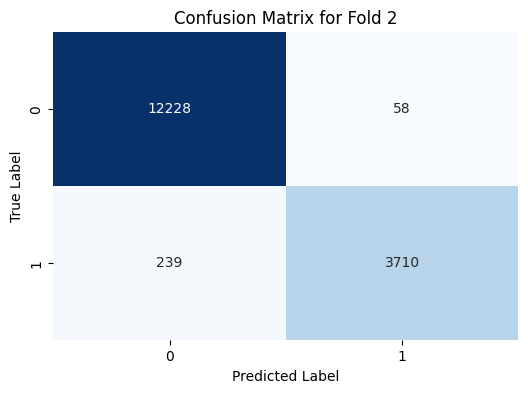

Fold 3
Early stopping triggered at epoch 6
Accuracy for fold 3: 97.75%
F1 Score for fold 3: 0.9772
              precision    recall  f1-score   support

    abnormal       0.97      1.00      0.99     12365
      normal       1.00      0.91      0.95      3870

    accuracy                           0.98     16235
   macro avg       0.98      0.95      0.97     16235
weighted avg       0.98      0.98      0.98     16235



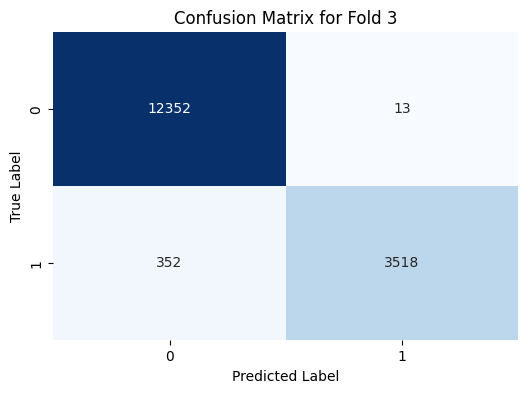

Fold 4
Early stopping triggered at epoch 14
Accuracy for fold 4: 98.10%
F1 Score for fold 4: 0.9808
              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.99     12398
      normal       0.98      0.94      0.96      3836

    accuracy                           0.98     16234
   macro avg       0.98      0.97      0.97     16234
weighted avg       0.98      0.98      0.98     16234



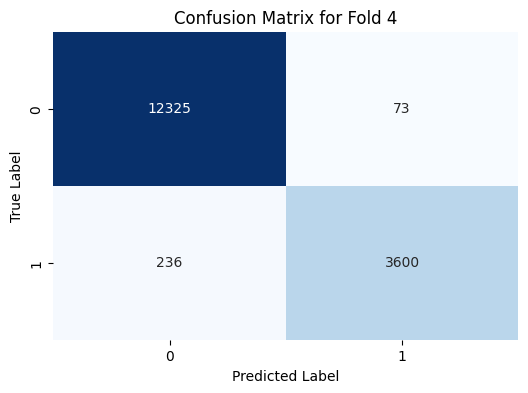

Fold 5
Early stopping triggered at epoch 15
Accuracy for fold 5: 98.13%
F1 Score for fold 5: 0.9811
              precision    recall  f1-score   support

    abnormal       0.98      0.99      0.99     12310
      normal       0.98      0.94      0.96      3924

    accuracy                           0.98     16234
   macro avg       0.98      0.97      0.97     16234
weighted avg       0.98      0.98      0.98     16234



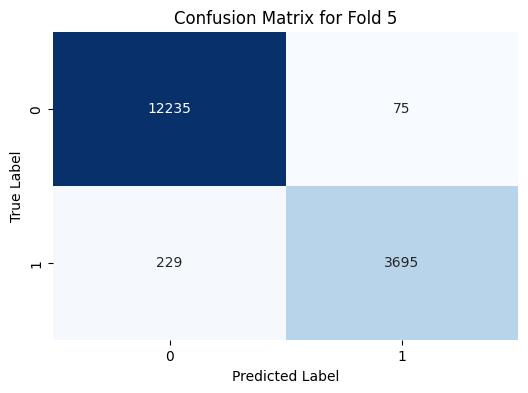

Average Accuracy: 98.02%
Average F1 Score: 0.9799


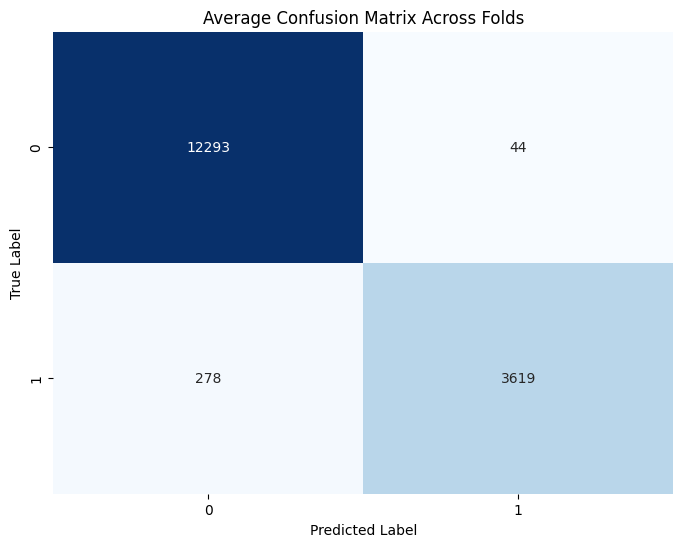

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming bin_data is already defined DataFrame
# Normalize the feature data
scaler = StandardScaler()
X_bin = scaler.fit_transform(bin_data.drop(columns=['label'], axis=1).values)
y_bin = bin_data['label'].values

# Define the Transformer model with batch_first=True
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4, batch_first=True),
            num_layers=3)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        x = self.fc(x)
        return x

# KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)
all_accuracy = []
conf_matrix_list = []
all_f1_scores = []

# Training and validation for each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_bin)):
    print(f'Fold {fold + 1}')

    # Split the data into training and validation sets
    X_train, X_val = X_bin[train_index], X_bin[val_index]
    y_train, y_val = y_bin[train_index], y_bin[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.LongTensor(y_train)
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader for batching
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train.shape[1], num_classes=2)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Initialize variables for early stopping and saving the best model
    best_accuracy = 0
    patience = 5  # Number of epochs with no improvement after which training will be stopped
    trigger_times = 0

    # Training the model
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        scheduler.step()  # Step the scheduler after each epoch

        # Evaluate the model on validation set
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred.numpy())

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

    # Calculate and store metrics
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    all_accuracy.append(accuracy)
    conf_matrix_list.append(conf_matrix)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    precision = precision_score(y_val, y_pred.numpy(), average='weighted')
    recall = recall_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=le1.classes_)
    print(cls_report)

    # Plot confusion matrix for each fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Average accuracy and F1 Score across folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plotting the average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()


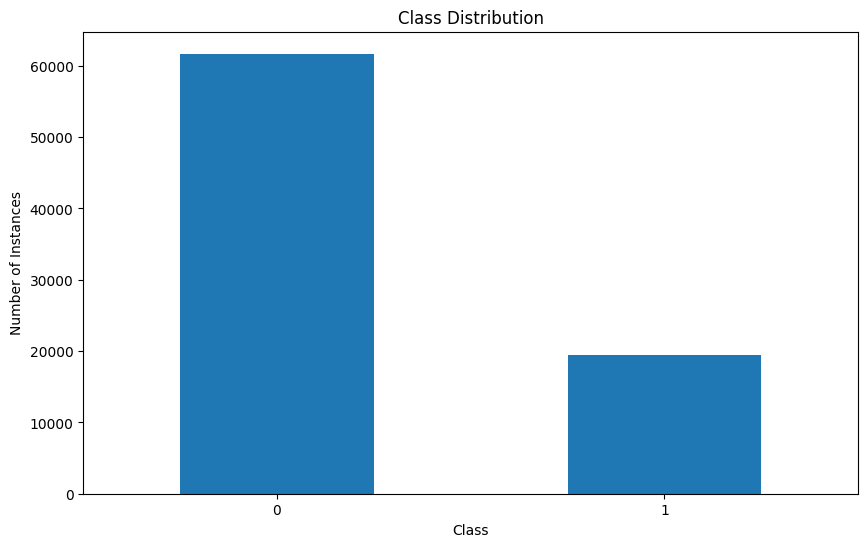

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming bin_data is your DataFrame
class_counts = bin_data['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()


# **MULTI-CLASS CLASSIFICATION**

Fold 1
Epoch 1/20, Loss: 1.4935, Accuracy: 70.18%
Epoch 2/20, Loss: 1.4125, Accuracy: 80.73%
Epoch 3/20, Loss: 1.5071, Accuracy: 89.90%
Epoch 4/20, Loss: 1.4322, Accuracy: 89.86%
Epoch 5/20, Loss: 1.3659, Accuracy: 86.54%
Epoch 6/20, Loss: 1.3738, Accuracy: 76.31%
Epoch 7/20, Loss: 1.3715, Accuracy: 89.87%
Early stopping triggered at epoch 8
Accuracy for fold 1: 84.79%
F1 Score for fold 1: 0.8518
Precision for fold 1: 0.8593
Recall for fold 1: 0.8479
                precision    recall  f1-score   support

      Analysis       0.04      0.48      0.07       112
      Backdoor       0.00      0.00      0.00        22
           DoS       0.00      0.00      0.00       352
      Exploits       0.71      0.72      0.72      3280
       Fuzzers       0.00      0.00      0.00       352
       Generic       0.98      0.99      0.99      7843
        Normal       1.00      0.91      0.95      3909
Reconnaissance       0.00      0.00      0.00       350
         Worms       0.00      0.00     

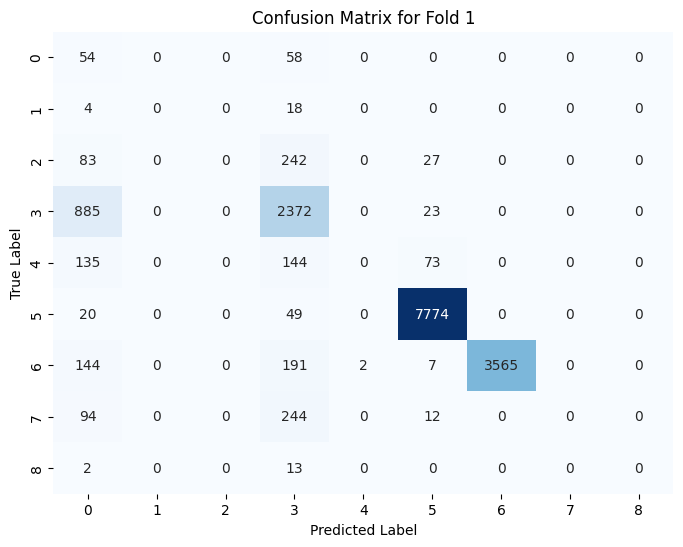

Fold 2
Epoch 1/20, Loss: 1.4839, Accuracy: 62.96%
Epoch 2/20, Loss: 1.4616, Accuracy: 80.52%
Epoch 3/20, Loss: 1.4673, Accuracy: 76.77%
Epoch 4/20, Loss: 1.3710, Accuracy: 89.82%
Epoch 5/20, Loss: 1.4250, Accuracy: 89.84%
Epoch 6/20, Loss: 1.3689, Accuracy: 85.65%
Epoch 7/20, Loss: 1.3747, Accuracy: 79.30%
Epoch 8/20, Loss: 1.3646, Accuracy: 85.03%
Epoch 9/20, Loss: 1.3628, Accuracy: 83.85%
Early stopping triggered at epoch 10
Accuracy for fold 2: 84.45%
F1 Score for fold 2: 0.8497
Precision for fold 2: 0.8608
Recall for fold 2: 0.8445
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       126
      Backdoor       0.00      0.00      0.00        20
           DoS       0.00      0.00      0.00       354
      Exploits       0.70      0.68      0.69      3187
       Fuzzers       0.09      0.43      0.15       327
       Generic       0.98      0.99      0.99      7909
        Normal       1.00      0.91      0.95      3949
Reconnais

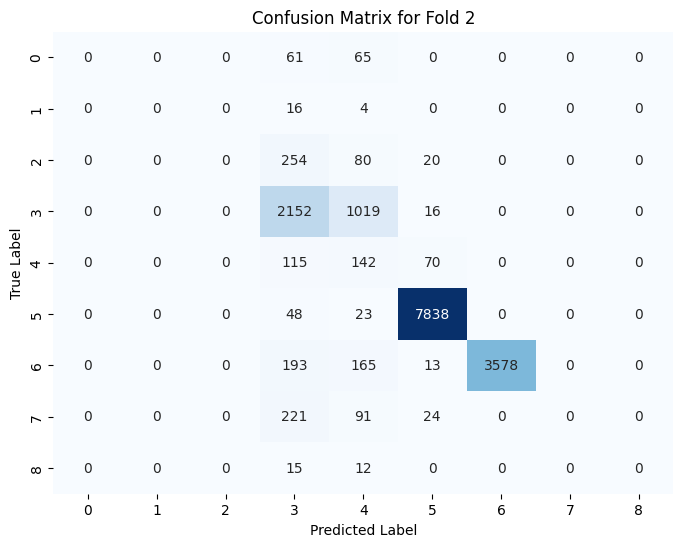

Fold 3
Epoch 1/20, Loss: 1.5189, Accuracy: 90.01%
Epoch 2/20, Loss: 1.4203, Accuracy: 90.00%
Epoch 3/20, Loss: 1.4082, Accuracy: 90.01%
Epoch 4/20, Loss: 1.4112, Accuracy: 90.01%
Epoch 5/20, Loss: 1.5311, Accuracy: 23.70%
Epoch 6/20, Loss: 1.4086, Accuracy: 90.03%
Epoch 7/20, Loss: 1.4142, Accuracy: 89.99%
Epoch 8/20, Loss: 1.4233, Accuracy: 90.02%
Epoch 9/20, Loss: 1.4039, Accuracy: 90.01%
Epoch 10/20, Loss: 1.4012, Accuracy: 90.01%
Early stopping triggered at epoch 11
Accuracy for fold 3: 90.01%
F1 Score for fold 3: 0.8723
Precision for fold 3: 0.8570
Recall for fold 3: 0.9001
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00        92
      Backdoor       0.00      0.00      0.00        17
           DoS       0.00      0.00      0.00       338
      Exploits       0.68      0.99      0.81      3207
       Fuzzers       0.00      0.00      0.00       375
       Generic       0.98      0.99      0.99      7993
        Normal       

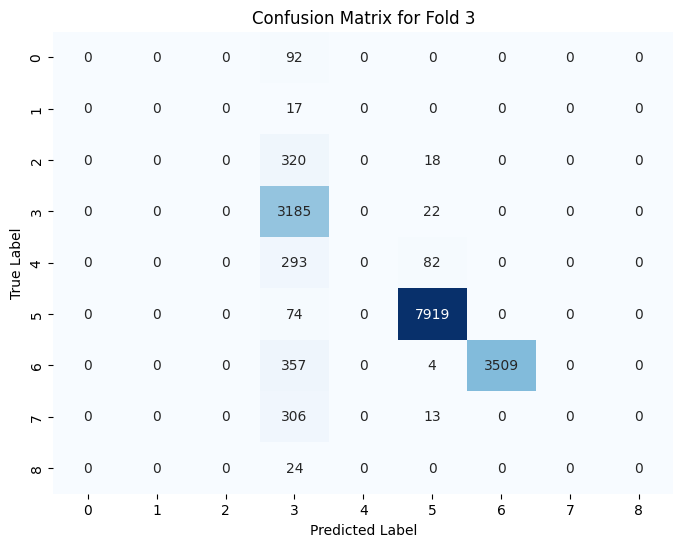

Fold 4
Epoch 1/20, Loss: 1.4180, Accuracy: 83.17%
Epoch 2/20, Loss: 1.4934, Accuracy: 89.76%
Epoch 3/20, Loss: 1.3830, Accuracy: 89.77%
Epoch 4/20, Loss: 1.3662, Accuracy: 74.43%
Epoch 5/20, Loss: 1.3688, Accuracy: 83.21%
Epoch 6/20, Loss: 1.3714, Accuracy: 85.83%
Epoch 7/20, Loss: 1.3651, Accuracy: 75.03%
Early stopping triggered at epoch 8
Accuracy for fold 4: 89.77%
F1 Score for fold 4: 0.8692
Precision for fold 4: 0.8538
Recall for fold 4: 0.8977
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       116
      Backdoor       0.00      0.00      0.00        23
           DoS       0.00      0.00      0.00       351
      Exploits       0.68      0.99      0.80      3217
       Fuzzers       0.00      0.00      0.00       337
       Generic       0.98      0.99      0.99      7977
        Normal       1.00      0.91      0.95      3836
Reconnaissance       0.00      0.00      0.00       348
         Worms       0.00      0.00     

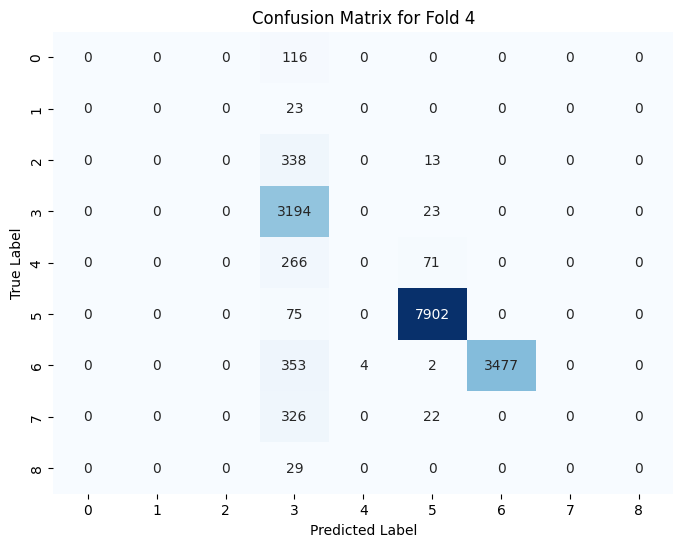

Fold 5
Epoch 1/20, Loss: 1.4409, Accuracy: 89.44%
Epoch 2/20, Loss: 1.4134, Accuracy: 62.26%
Epoch 3/20, Loss: 1.4517, Accuracy: 80.17%
Epoch 4/20, Loss: 1.4423, Accuracy: 80.13%
Epoch 5/20, Loss: 1.3834, Accuracy: 81.99%
Epoch 6/20, Loss: 1.3670, Accuracy: 89.52%
Epoch 7/20, Loss: 1.3841, Accuracy: 79.68%
Epoch 8/20, Loss: 1.3714, Accuracy: 76.67%
Epoch 9/20, Loss: 1.3689, Accuracy: 89.44%
Epoch 10/20, Loss: 1.3701, Accuracy: 81.96%
Early stopping triggered at epoch 11
Accuracy for fold 5: 80.58%
F1 Score for fold 5: 0.8242
Precision for fold 5: 0.8647
Recall for fold 5: 0.8058
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       118
      Backdoor       0.00      0.00      0.00        17
           DoS       0.00      0.00      0.00       396
      Exploits       0.74      0.48      0.58      3296
       Fuzzers       0.09      0.69      0.15       340
       Generic       0.98      0.99      0.99      7774
        Normal       

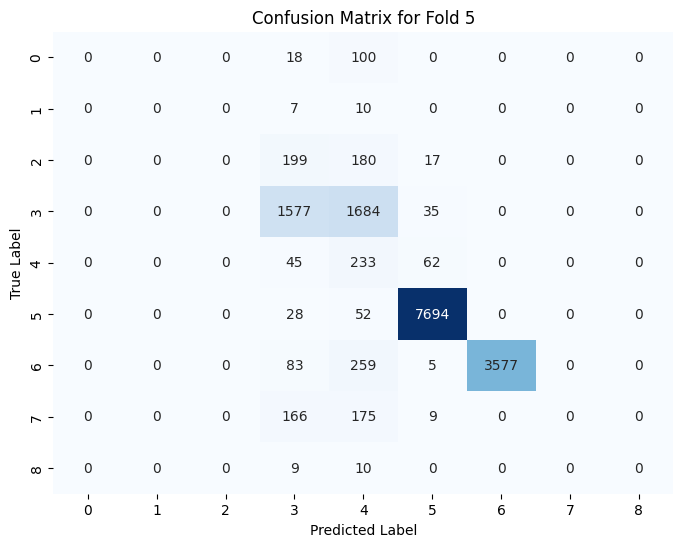

Average Accuracy: 85.92%
Average F1 Score: 0.8535


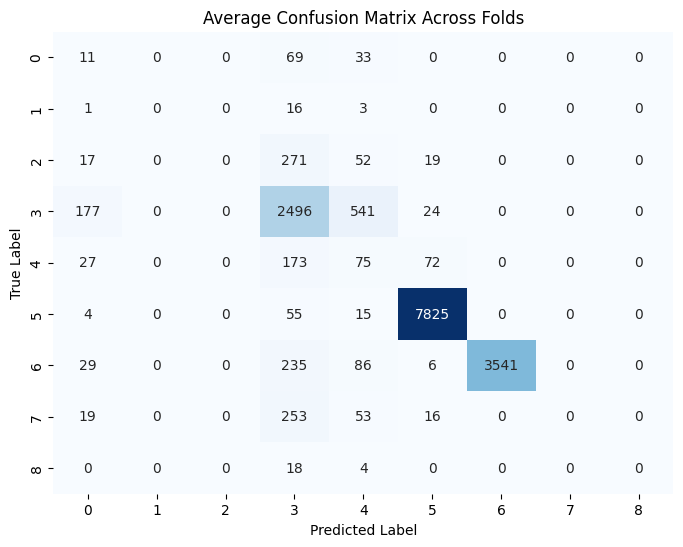

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             f1_score, precision_score, recall_score)
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Assuming multi_data is already defined DataFrame
# Normalize the feature data
scaler = StandardScaler()
X_multi = scaler.fit_transform(multi_data.drop(columns=['label'], axis=1).values)
y_multi = multi_data['label'].values

num_classes = len(np.unique(y_multi))

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_multi), y=y_multi)
class_weights = torch.FloatTensor(class_weights)

# Define the Transformer model with batch_first=True
class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 64)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=64, nhead=4, batch_first=True),
            num_layers=3)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Average pooling
        x = self.fc(x)
        return x

# KFold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)
all_accuracy = []
conf_matrix_list = []
all_f1_scores = []

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class_weights = class_weights.to(device)

# Training and validation for each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_multi)):
    print(f'Fold {fold + 1}')

    # Split the data into training and validation sets
    X_train, X_val = X_multi[train_index], X_multi[val_index]
    y_train, y_val = y_multi[train_index], y_multi[val_index]

    # Convert to PyTorch tensors and move to device
    X_train_tensor = torch.FloatTensor(X_train).to(device)
    y_train_tensor = torch.LongTensor(y_train).to(device)
    X_val_tensor = torch.FloatTensor(X_val).to(device)
    y_val_tensor = torch.LongTensor(y_val).to(device)

    # Create DataLoader for batching
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize the model
    model = TransformerModel(input_dim=X_train.shape[1], num_classes=num_classes).to(device)

    # Use class weights in the loss function
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5)

    # Initialize variables for early stopping and saving the best model
    best_accuracy = 0
    patience = 5
    trigger_times = 0

    # Training the model
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        # Evaluate the model on validation set
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred.cpu().numpy())

        # Save the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), f'model_multi_fold_{fold + 1}.pt')
            trigger_times = 0
        else:
            trigger_times += 1

        # Early stopping logic
        if trigger_times >= patience:
            print(f'Early stopping triggered at epoch {epoch + 1}')
            break

        # Step the scheduler with the validation accuracy
        scheduler.step(accuracy)

        # Log training loss and accuracy
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

    # Calculate and store metrics
    conf_matrix = confusion_matrix(y_val, y_pred.cpu().numpy())
    all_accuracy.append(accuracy)
    conf_matrix_list.append(conf_matrix)

    f1 = f1_score(y_val, y_pred.cpu().numpy(), average='weighted', zero_division=0)
    precision = precision_score(y_val, y_pred.cpu().numpy(), average='weighted', zero_division=0)
    recall = recall_score(y_val, y_pred.cpu().numpy(), average='weighted', zero_division=0)
    all_f1_scores.append(f1)

    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(f'Precision for fold {fold + 1}: {precision:.4f}')
    print(f'Recall for fold {fold + 1}: {recall:.4f}')

    cls_report = classification_report(y_val, y_pred.cpu().numpy(), zero_division=0, target_names=le2.classes_)
    print(cls_report)

    # Plot confusion matrix for each fold
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Average accuracy and F1 Score across folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plotting the average confusion matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()


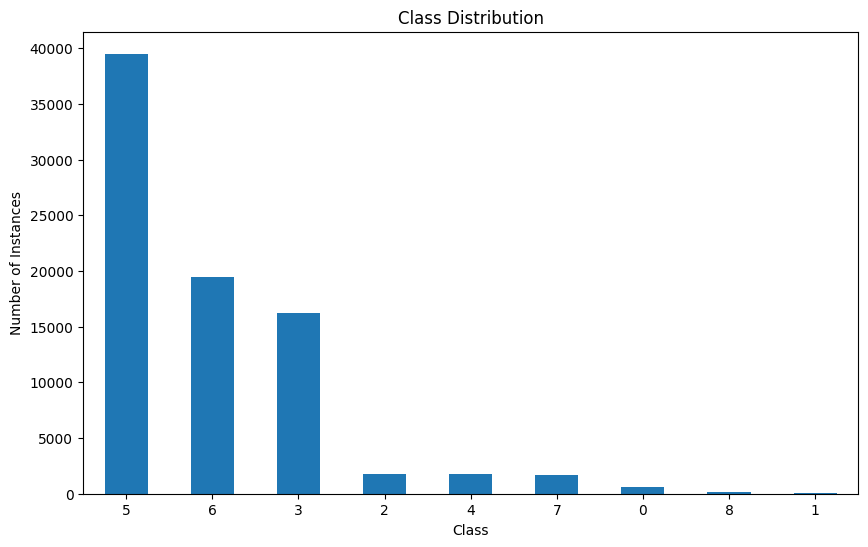

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming multi_data is your DataFrame
class_counts = multi_data['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()
